In [ ]:
from google.colab import drive
drive.mount('/content/drive')
raw_data_dir = img_dir = "/content/drive/MyDrive/Classes/Fall 2024/Quant Bio/Methods in Quant Bio - Final Project/data_notebooks/archive"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import numpy as np
import pandas as pd
import os
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

#import warnings
#warnings.filterwarnings('ignore')

In [5]:
csv_files = [f for f in os.listdir(raw_data_dir) if f.endswith('.csv')]

combined_df = pd.concat([pd.read_csv(os.path.join(raw_data_dir, file)) for file in csv_files], ignore_index=True)

combined_df.head()

NameError: name 'raw_data_dir' is not defined

In [6]:
from google.colab import drive
drive.mount('/content/drive')
combined_df = pd.read_csv("/content/drive/MyDrive/Katie Programming Folder/20241127_brainwaves.csv")

Mounted at /content/drive


In [7]:
missing_percentage = combined_df.isnull().sum() / len(combined_df) * 100

missing_percentage

,0
TimeStamp,0.0
Delta_TP9,0.0
Delta_AF7,0.0
Delta_AF8,0.0
Delta_TP10,0.0
Theta_TP9,0.0
Theta_AF7,0.0
Theta_AF8,0.0
Theta_TP10,0.0
Alpha_TP9,0.0


In [8]:
# Drop the 'Elements' column
if 'Elements' in combined_df.columns:
    combined_df.drop(columns=['Elements'], inplace=True)

In [9]:
###remove NAs and rows that have more than 10% of their info missing
# Calculate the percentage of missing values in each column (excludes the Elements column now)
missing_percentage = combined_df.isnull().sum() / len(combined_df) * 100


columns_to_drop_na = missing_percentage[missing_percentage < 10].index
combined_df = combined_df.dropna(subset=columns_to_drop_na)

columns_to_fill_median = missing_percentage[missing_percentage >= 10].index
for column in columns_to_fill_median:
    median_value = combined_df[column].median()
    combined_df[column].fillna(median_value, inplace=True)

remaining_missing = combined_df.isnull().sum().sum()

if remaining_missing > 0:
    print("Columns with remaining missing values after processing:\n", combined_df.isnull().sum())

# Ensure no NaNs or Infs are present
combined_df = combined_df.replace([float('inf'), float('-inf')], pd.NA)
combined_df = combined_df.dropna()

combined_df.head()

,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,Delta_PCA,Theta_PCA,Alpha_PCA,Beta_PCA,Gamma_PCA,Delta_Median,Theta_Median,Alpha_Median,Beta_Median,Gamma_Median
0,2024-06-13 14:10:20.376,0.01898,0.901503,0.509348,0.5102,0.24,-0.579461,0.365699,0.380469,0.580544,...,-0.535707,-1.100514,-1.61249,4.059653,4.834012,0.509775,0.302849,0.363222,0.949131,0.722248
1,2024-06-13 14:10:20.378,0.01898,0.901503,0.509348,0.5102,0.24,-0.579461,0.365699,0.380469,0.580544,...,-0.535707,-1.100514,-1.61249,4.059653,4.834012,0.509775,0.302849,0.363222,0.949131,0.722248
2,2024-06-13 14:10:20.378,0.01898,0.901503,0.509348,0.5102,0.24,-0.579461,0.365699,0.380469,0.580544,...,-0.535707,-1.100514,-1.61249,4.059653,4.834012,0.509775,0.302849,0.363222,0.949131,0.722248
3,2024-06-13 14:10:20.378,0.01898,0.901503,0.509348,0.5102,0.24,-0.579461,0.365699,0.380469,0.580544,...,-0.535707,-1.100514,-1.61249,4.059653,4.834012,0.509775,0.302849,0.363222,0.949131,0.722248
4,2024-06-13 14:10:20.379,0.01898,0.901503,0.509348,0.5102,0.24,-0.579461,0.365699,0.380469,0.580544,...,-0.535707,-1.100514,-1.61249,4.059653,4.834012,0.509775,0.302849,0.363222,0.949131,0.722248


In [10]:
combined_df.columns

Index(['TimeStamp', 'Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10',
       'Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9',
       'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10', 'Beta_TP9', 'Beta_AF7',
       'Beta_AF8', 'Beta_TP10', 'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8',
       'Gamma_TP10', 'RAW_TP9', 'RAW_AF7', 'RAW_AF8', 'RAW_TP10', 'AUX_RIGHT',
       'Mellow', 'Concentration', 'Accelerometer_X', 'Accelerometer_Y',
       'Accelerometer_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z', 'HeadBandOn',
       'HSI_TP9', 'HSI_AF7', 'HSI_AF8', 'HSI_TP10', 'Battery', 'Delta_PCA',
       'Theta_PCA', 'Alpha_PCA', 'Beta_PCA', 'Gamma_PCA', 'Delta_Median',
       'Theta_Median', 'Alpha_Median', 'Beta_Median', 'Gamma_Median'],
      dtype='object')

In [11]:
# Calculate sampling frequency from timestamps
combined_df['TimeStamp'] = pd.to_datetime(combined_df['TimeStamp'])
time_diffs = combined_df['TimeStamp'].diff().dt.total_seconds()
fs = 1 / time_diffs.mean()
print(f"Calculated Sampling Frequency: {fs} Hz")

Calculated Sampling Frequency: 7.733532056624771 Hz


In [12]:
bands = {
    'Delta': ['Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10'],
    'Theta': ['Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10'],
    'Alpha': ['Alpha_TP9', 'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10'],
    'Beta': ['Beta_TP9', 'Beta_AF7', 'Beta_AF8', 'Beta_TP10'],
    'Gamma': ['Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8', 'Gamma_TP10']
}

pca_results = {}

# Apply PCA and calculate the median for each band
for band, columns in bands.items():
    standardized_data = (combined_df[columns] - combined_df[columns].mean()) / combined_df[columns].std()

    # Fit PCA with 1 component
    pca = PCA(n_components=1)
    pca_results[band] = pca.fit_transform(standardized_data)  # First principal component

    # Add PCA component to the DataFrame
    combined_df[f'{band}_PCA'] = pca_results[band]

    # Calculate the median for each band
    combined_df[f'{band}_Median'] = combined_df[columns].median(axis=1)

    print(f"{band} PCA Explained Variance Ratio: {pca.explained_variance_ratio_[0]:.2%}")

print(combined_df[[f'{band}_PCA' for band in bands.keys()] + [f'{band}_Median' for band in bands.keys()]].head())


Delta PCA Explained Variance Ratio: 73.20%
Theta PCA Explained Variance Ratio: 67.70%
Alpha PCA Explained Variance Ratio: 67.68%
Beta PCA Explained Variance Ratio: 70.71%
Gamma PCA Explained Variance Ratio: 63.75%
   Delta_PCA  Theta_PCA  Alpha_PCA  Beta_PCA  Gamma_PCA  Delta_Median  \
0  -0.535707  -1.100514   -1.61249  4.059653   4.834012      0.509775   
1  -0.535707  -1.100514   -1.61249  4.059653   4.834012      0.509775   
2  -0.535707  -1.100514   -1.61249  4.059653   4.834012      0.509775   
3  -0.535707  -1.100514   -1.61249  4.059653   4.834012      0.509775   
4  -0.535707  -1.100514   -1.61249  4.059653   4.834012      0.509775   

   Theta_Median  Alpha_Median  Beta_Median  Gamma_Median  
0      0.302849      0.363222     0.949131      0.722248  
1      0.302849      0.363222     0.949131      0.722248  
2      0.302849      0.363222     0.949131      0.722248  
3      0.302849      0.363222     0.949131      0.722248  
4      0.302849      0.363222     0.949131      0.72

In [ ]:
csv_path = "/content/drive/MyDrive/Classes/Fall 2024/Quant Bio/Methods in Quant Bio - Final Project/data_notebooks/20241127_brainwaves.csv"

combined_df.to_csv(csv_path, index=False)

## Below - Exploratory analysis with the processed csv

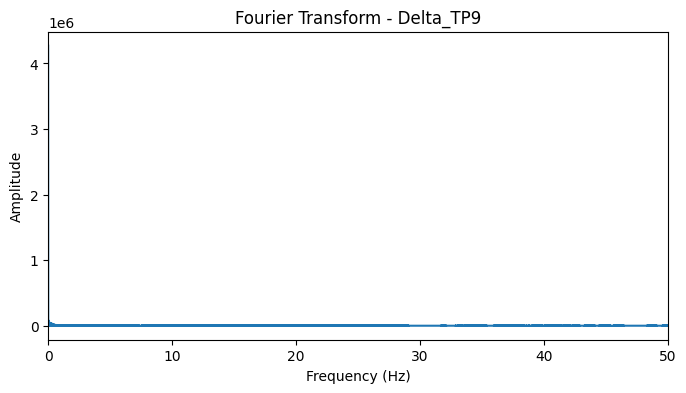

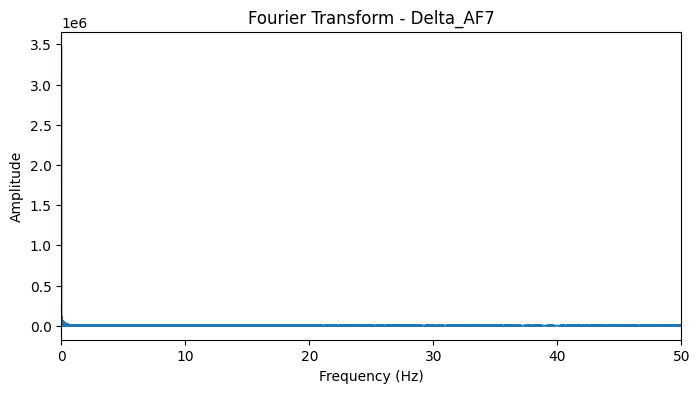

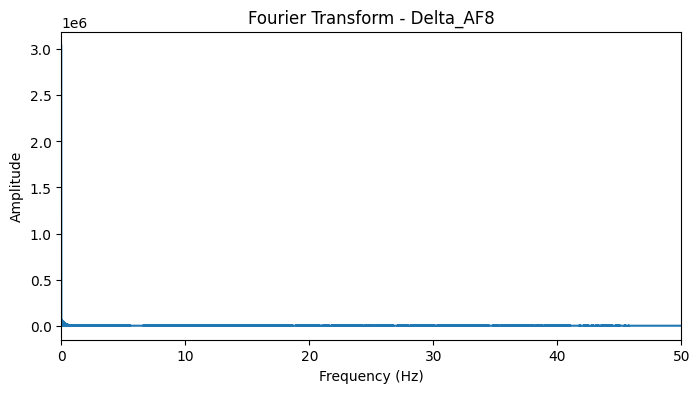

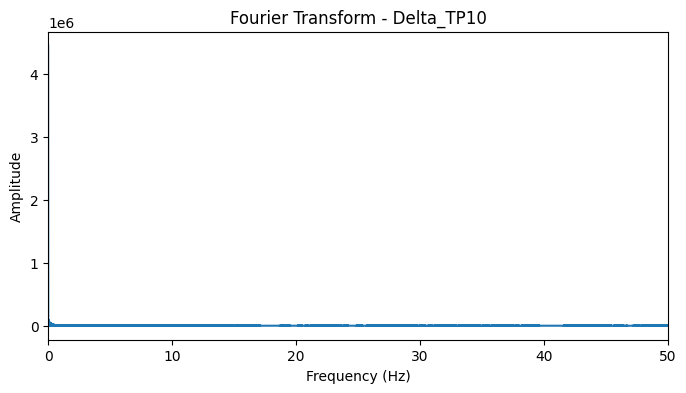

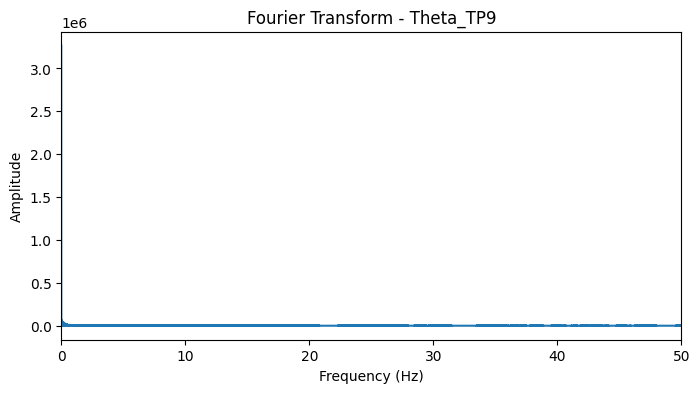

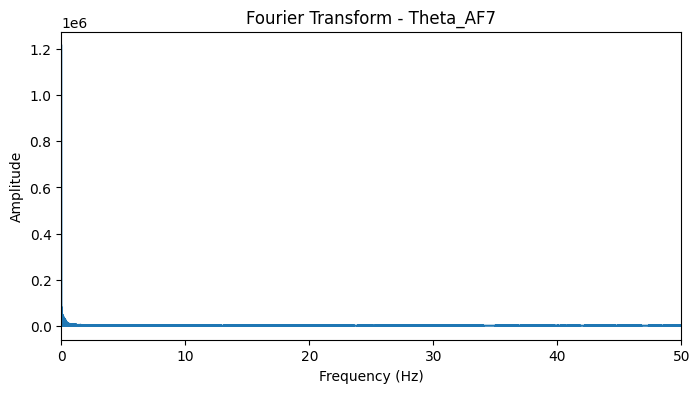

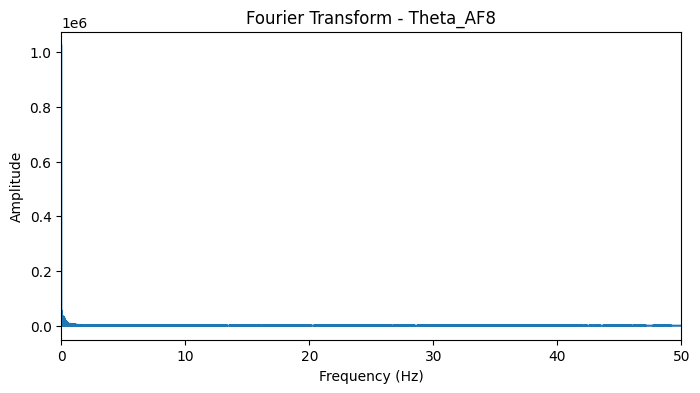

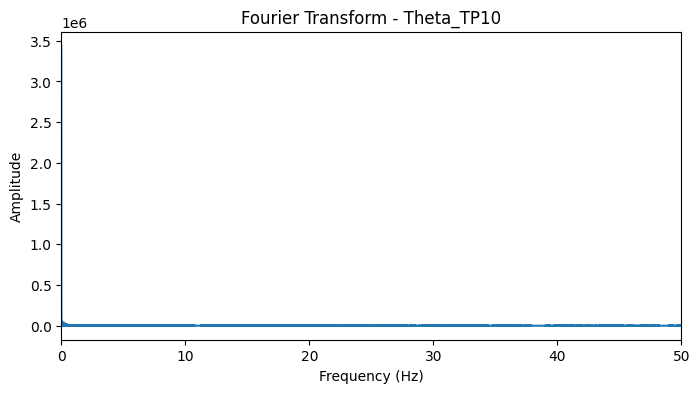

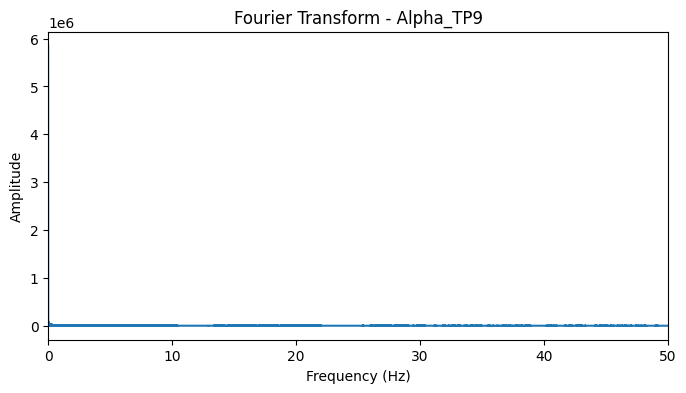

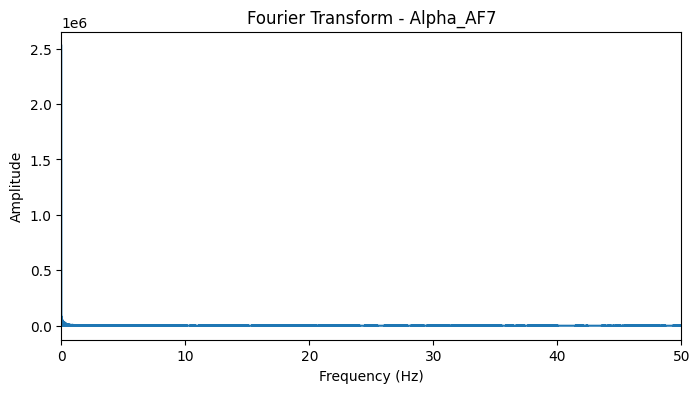

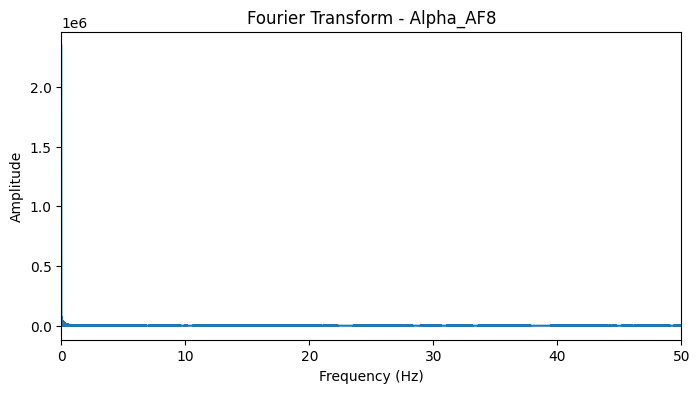

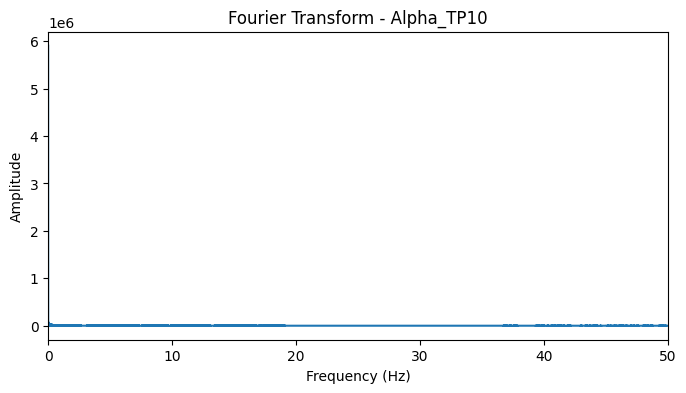

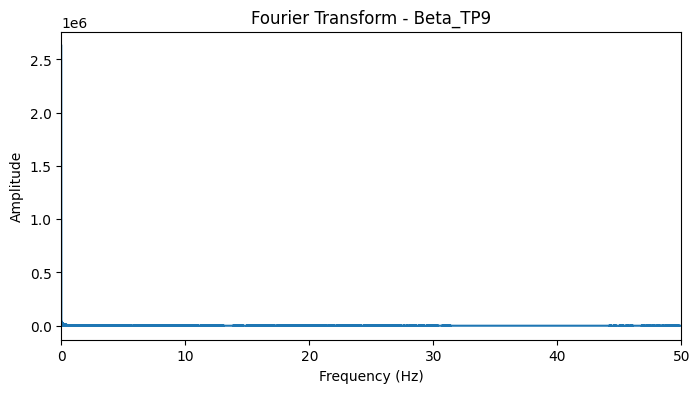

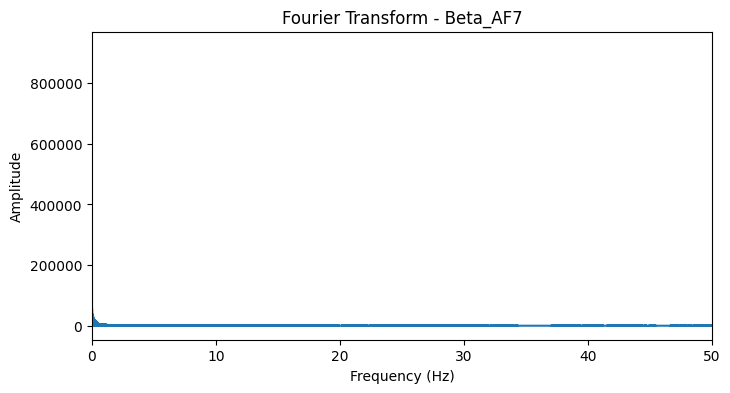

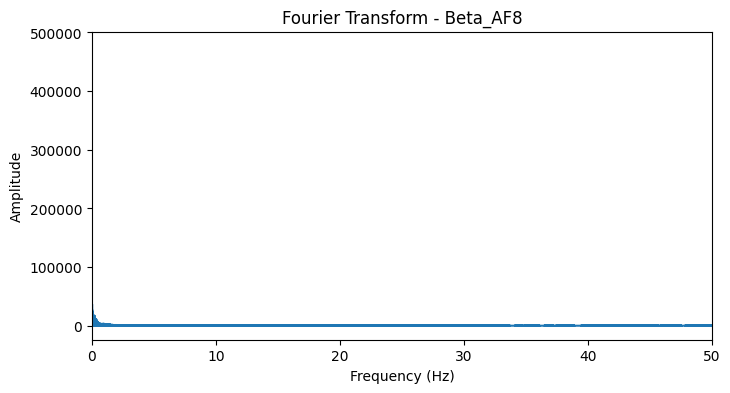

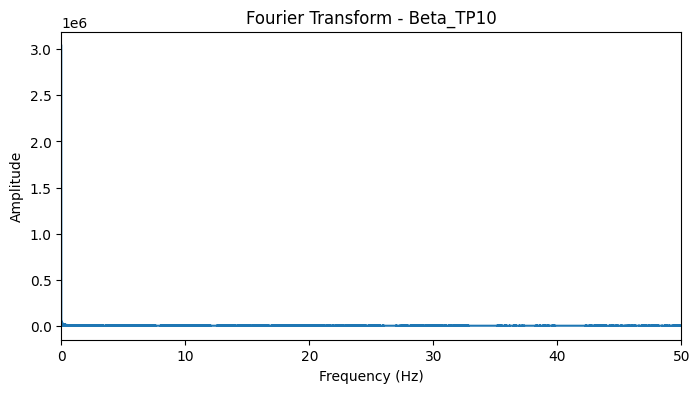

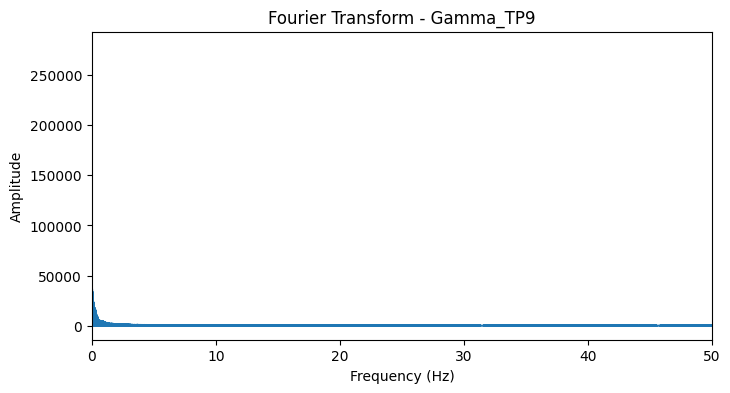

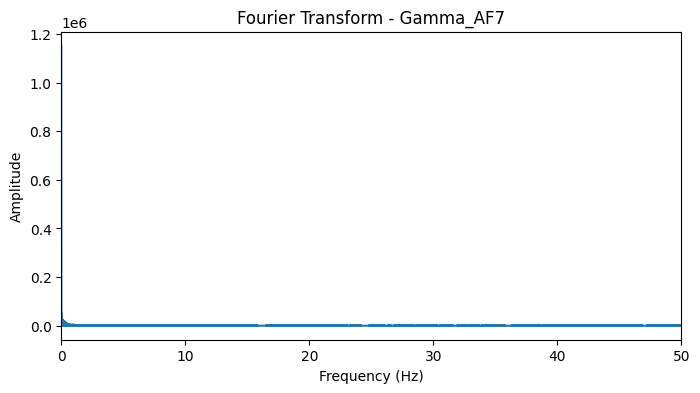

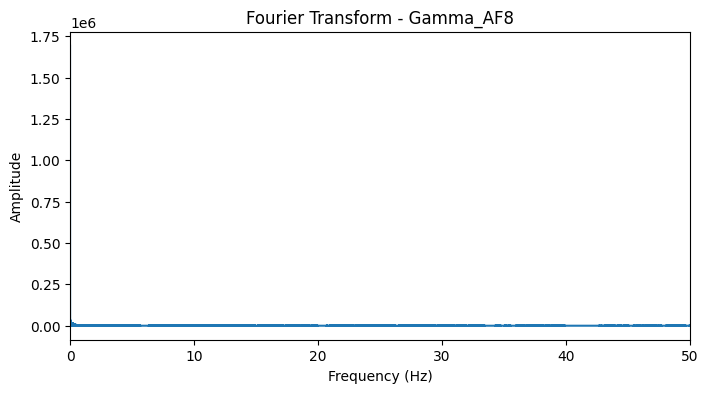

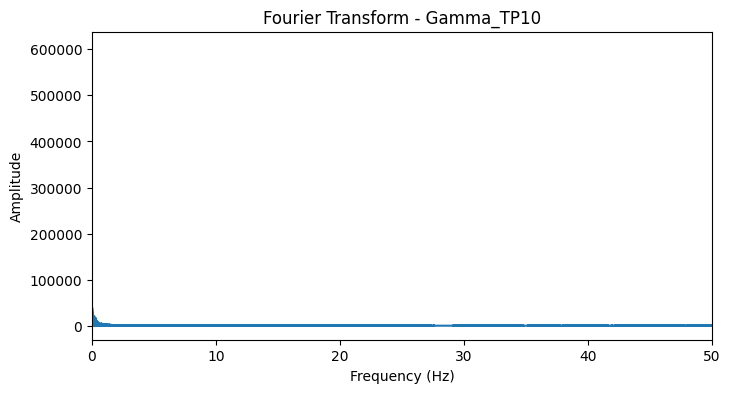

  Channel_Band   Total_Power  Peak_Frequency   Delta_Power   Theta_Power  \
0    Delta_TP9  6.436549e+08        0.000031  1.507851e+08  4.750232e+07   
1    Delta_AF7  6.544546e+08        0.000031  1.436163e+08  4.404639e+07   
2    Delta_AF8  5.228847e+08        0.000031  1.156960e+08  3.406879e+07   
3   Delta_TP10  6.500698e+08        0.000031  1.510585e+08  4.776803e+07   
4    Theta_TP9  4.776386e+08        0.000031  1.108164e+08  3.406631e+07   

    Alpha_Power    Beta_Power   Gamma_Power  
0  3.082820e+07  6.594428e+07  3.800772e+07  
1  3.046278e+07  6.247256e+07  3.625818e+07  
2  2.490008e+07  4.943861e+07  2.890228e+07  
3  3.100528e+07  6.601993e+07  3.815028e+07  
4  2.287469e+07  4.787507e+07  2.767994e+07  


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq

# Step 2: Define EEG columns to keep (Use raw EEG signals, not PCA/Median versions)
powerbands = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
channels = ['TP9', 'AF7', 'AF8', 'TP10']
eeg_columns = [f'{band}_{channel}' for band in powerbands for channel in channels]

# Extract only raw EEG data (not PCA/Median)
eeg_df = combined_df[eeg_columns]

# Handle missing values by filling with the median for each column
eeg_df = eeg_df.fillna(eeg_df.median())

# **Set the correct sampling rate** (Muse2 default is 256 Hz)
sampling_rate = 256

# Step 3: Fourier Transform for each powerband/channel combination
features = []  # Store extracted features

for col in eeg_columns:
    signal = eeg_df[col].values  # Extract the signal
    N = len(signal)  # Number of samples

    # **Zero-pad the signal** to ensure N is a power of 2 (better FFT performance)
    padded_signal = np.pad(signal, (0, 2**np.ceil(np.log2(N)).astype(int) - N), 'constant')
    N_padded = len(padded_signal)  # New padded signal length

    # **Apply FFT**
    fft_values = fft(padded_signal)
    fft_freqs = fftfreq(N_padded, d=1 / sampling_rate)

    # Only keep positive frequencies
    positive_freqs = fft_freqs[:N_padded // 2]
    positive_fft_values = np.abs(fft_values[:N_padded // 2])  # Take magnitude of FFT

    # **Feature Extraction**
    total_power = np.sum(positive_fft_values)  # Total power (sum of amplitude)

    # Extract peak frequency (exclude 0 Hz component)
    peak_index = np.argmax(positive_fft_values[1:]) + 1  # Skip DC component (0 Hz)
    peak_frequency = positive_freqs[peak_index]  # Get the frequency corresponding to the maximum amplitude

    # Extract power in the standard EEG bands
    band_power = {
        'Delta_Power': np.sum(positive_fft_values[(positive_freqs >= 0.5) & (positive_freqs < 4)]),
        'Theta_Power': np.sum(positive_fft_values[(positive_freqs >= 4) & (positive_freqs < 8)]),
        'Alpha_Power': np.sum(positive_fft_values[(positive_freqs >= 8) & (positive_freqs < 12)]),
        'Beta_Power': np.sum(positive_fft_values[(positive_freqs >= 12) & (positive_freqs < 30)]),
        'Gamma_Power': np.sum(positive_fft_values[(positive_freqs >= 30) & (positive_freqs < 50)])
    }

    # Store extracted features
    feature_row = {'Channel_Band': col, 'Total_Power': total_power, 'Peak_Frequency': peak_frequency}
    feature_row.update(band_power)  # Add band power features
    features.append(feature_row)

    # **Optional Plot**
    plt.figure(figsize=(8, 4))
    plt.plot(positive_freqs, positive_fft_values)
    plt.title(f'Fourier Transform - {col}')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Amplitude')
    plt.xlim(0, 50)  # Focus on frequencies in the range [0, 50 Hz]
    plt.show()

# Step 4: Save features to CSV
features_df = pd.DataFrame(features)
print(features_df.head())
features_df.to_csv('fourier_features.csv', index=False)


In [ ]:
neuro_df = pd.read_csv("/content/drive/MyDrive/Classes/Fall 2024/Quant Bio/Methods in Quant Bio - Final Project/data_notebooks/20241127_brainwaves.csv")

In [ ]:
neuro_df.head()

,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,Delta_PCA,Theta_PCA,Alpha_PCA,Beta_PCA,Gamma_PCA,Delta_Median,Theta_Median,Alpha_Median,Beta_Median,Gamma_Median
0,2024-06-13 14:10:20.376,0.01898,0.901503,0.509348,0.5102,0.24,-0.579461,0.365699,0.380469,0.580544,...,-0.535707,-1.100514,-1.61249,4.059653,4.834012,0.509775,0.302849,0.363222,0.949131,0.722248
1,2024-06-13 14:10:20.378,0.01898,0.901503,0.509348,0.5102,0.24,-0.579461,0.365699,0.380469,0.580544,...,-0.535707,-1.100514,-1.61249,4.059653,4.834012,0.509775,0.302849,0.363222,0.949131,0.722248
2,2024-06-13 14:10:20.378,0.01898,0.901503,0.509348,0.5102,0.24,-0.579461,0.365699,0.380469,0.580544,...,-0.535707,-1.100514,-1.61249,4.059653,4.834012,0.509775,0.302849,0.363222,0.949131,0.722248
3,2024-06-13 14:10:20.378,0.01898,0.901503,0.509348,0.5102,0.24,-0.579461,0.365699,0.380469,0.580544,...,-0.535707,-1.100514,-1.61249,4.059653,4.834012,0.509775,0.302849,0.363222,0.949131,0.722248
4,2024-06-13 14:10:20.379,0.01898,0.901503,0.509348,0.5102,0.24,-0.579461,0.365699,0.380469,0.580544,...,-0.535707,-1.100514,-1.61249,4.059653,4.834012,0.509775,0.302849,0.363222,0.949131,0.722248


In [ ]:
neuro_df.columns

Index(['TimeStamp', 'Delta_TP9', 'Delta_AF7', 'Delta_AF8', 'Delta_TP10',
       'Theta_TP9', 'Theta_AF7', 'Theta_AF8', 'Theta_TP10', 'Alpha_TP9',
       'Alpha_AF7', 'Alpha_AF8', 'Alpha_TP10', 'Beta_TP9', 'Beta_AF7',
       'Beta_AF8', 'Beta_TP10', 'Gamma_TP9', 'Gamma_AF7', 'Gamma_AF8',
       'Gamma_TP10', 'RAW_TP9', 'RAW_AF7', 'RAW_AF8', 'RAW_TP10', 'AUX_RIGHT',
       'Mellow', 'Concentration', 'Accelerometer_X', 'Accelerometer_Y',
       'Accelerometer_Z', 'Gyro_X', 'Gyro_Y', 'Gyro_Z', 'HeadBandOn',
       'HSI_TP9', 'HSI_AF7', 'HSI_AF8', 'HSI_TP10', 'Battery', 'Delta_PCA',
       'Theta_PCA', 'Alpha_PCA', 'Beta_PCA', 'Gamma_PCA', 'Delta_Median',
       'Theta_Median', 'Alpha_Median', 'Beta_Median', 'Gamma_Median'],
      dtype='object')

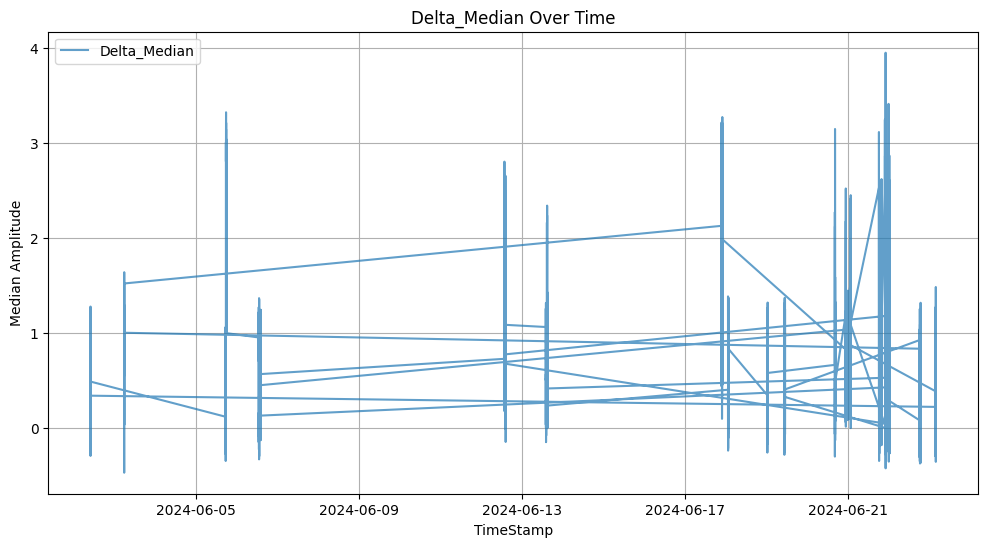

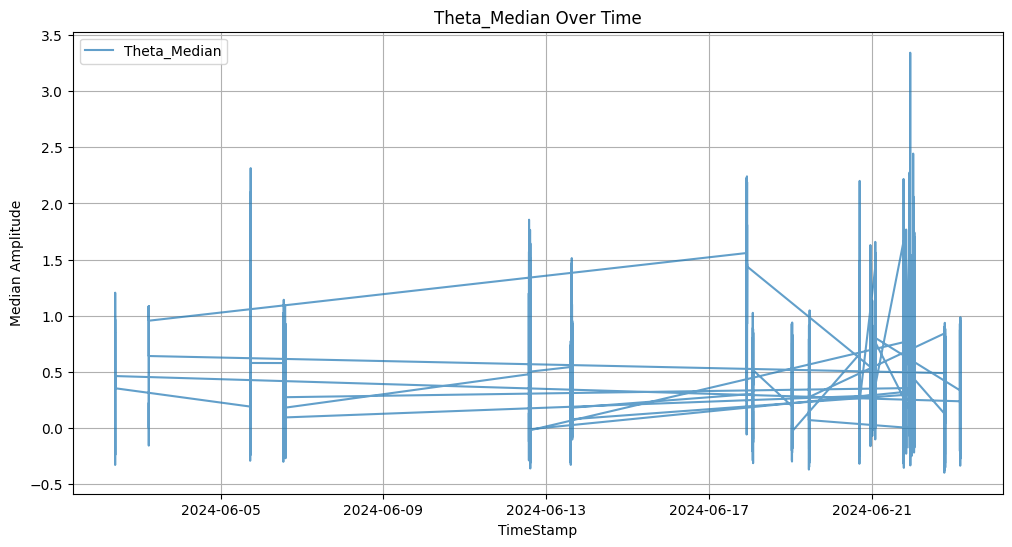

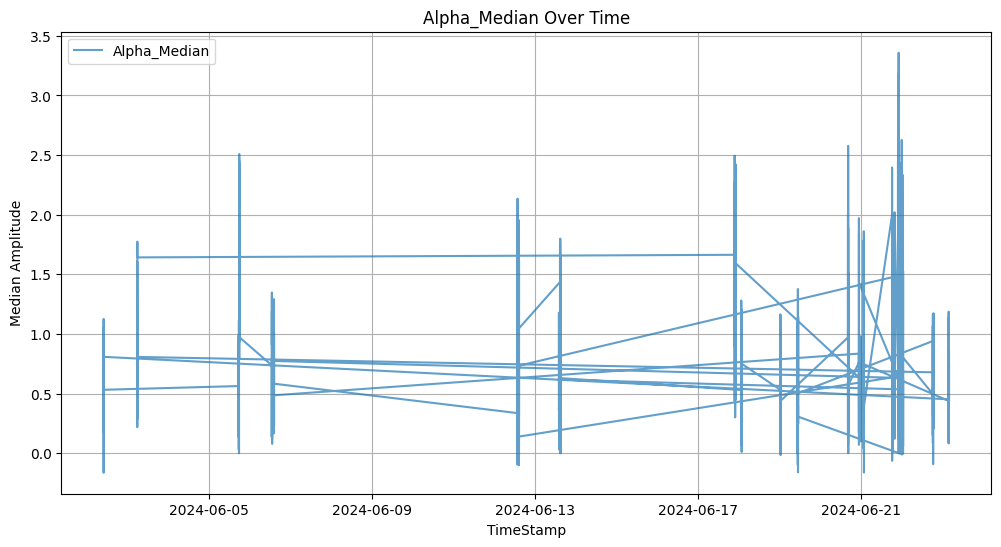

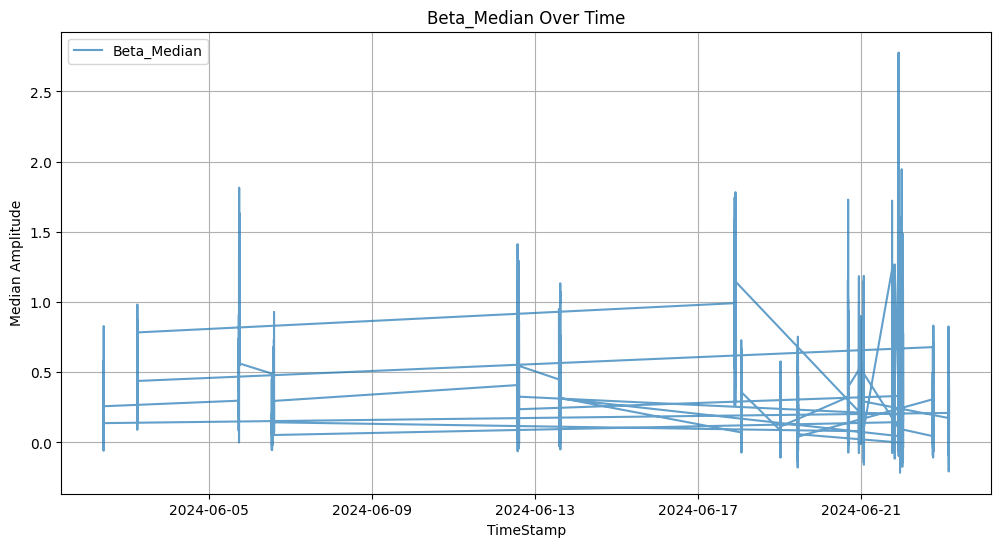

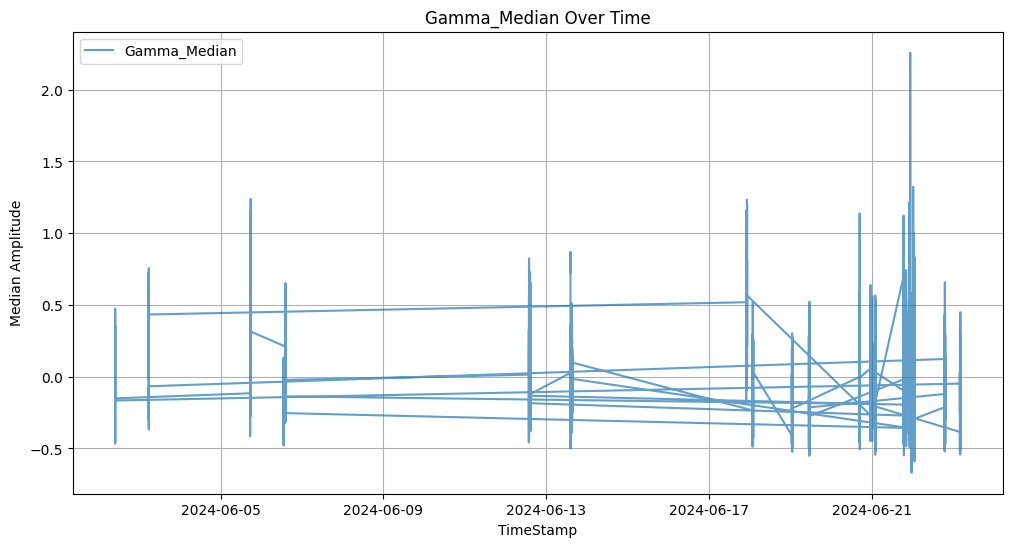

In [ ]:
# List of EEG band medians
bands = ['Delta_Median', 'Theta_Median', 'Alpha_Median', 'Beta_Median', 'Gamma_Median']

# Create individual plots for each band
for band in bands:
    plt.figure(figsize=(12, 6))
    plt.plot(neuro_df['TimeStamp'], neuro_df[band], label=band, alpha=0.7)
    plt.title(f'{band} Over Time')
    plt.xlabel('TimeStamp')
    plt.ylabel('Median Amplitude')
    plt.legend()
    plt.grid()
    plt.show()

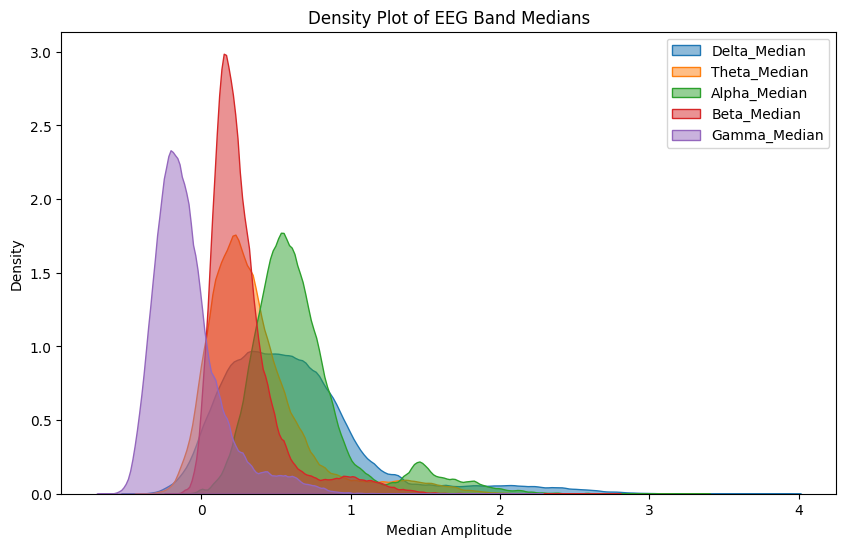

In [ ]:
# KDE plot for EEG band medians
plt.figure(figsize=(10, 6))
for band in ['Delta_Median', 'Theta_Median', 'Alpha_Median', 'Beta_Median', 'Gamma_Median']:
    sns.kdeplot(neuro_df[band], label=band, fill=True, alpha=0.5)

plt.title('Density Plot of EEG Band Medians')
plt.xlabel('Median Amplitude')
plt.ylabel('Density')
plt.legend()
#plt.grid()
plt.show()

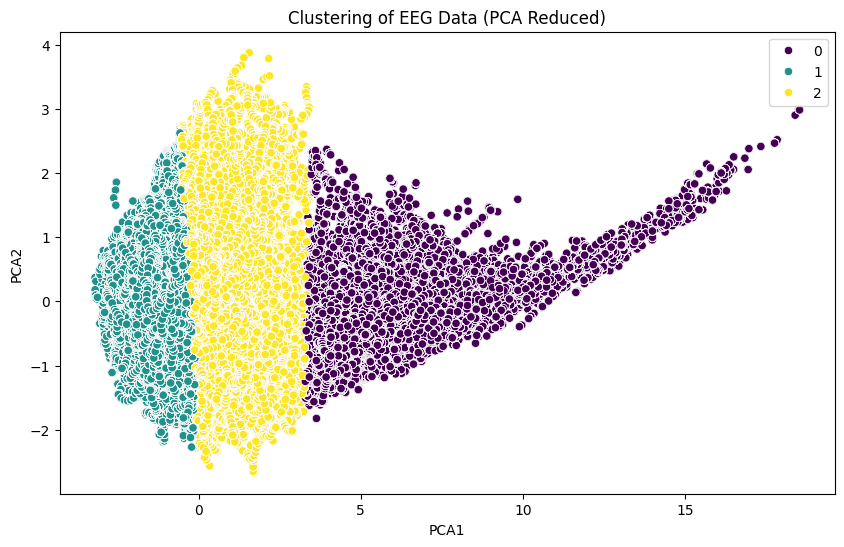

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Select EEG band medians
features = ['Delta_Median', 'Theta_Median', 'Alpha_Median', 'Beta_Median', 'Gamma_Median']
data = neuro_df[features]

# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Change n_clusters to your needs
neuro_df['Cluster'] = kmeans.fit_predict(scaled_data)

# Visualize clusters in 2D using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
neuro_df['PCA1'] = pca_result[:, 0]
neuro_df['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=neuro_df, palette='viridis')
plt.title('Clustering of EEG Data (PCA Reduced)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
#plt.grid()
plt.show()


In [ ]:
#Explore Cluster Characteristics: Investigate the EEG band medians within each cluster:
cluster_means = neuro_df.groupby('Cluster')[features].mean()
print(cluster_means)

         Delta_Median  Theta_Median  Alpha_Median  Beta_Median  Gamma_Median
Cluster                                                                     
0            2.038463      1.365115      1.698016     1.005439      0.486112
1            0.374630      0.185709      0.508970     0.154704     -0.220452
2            0.739371      0.452234      0.741192     0.344882     -0.008743


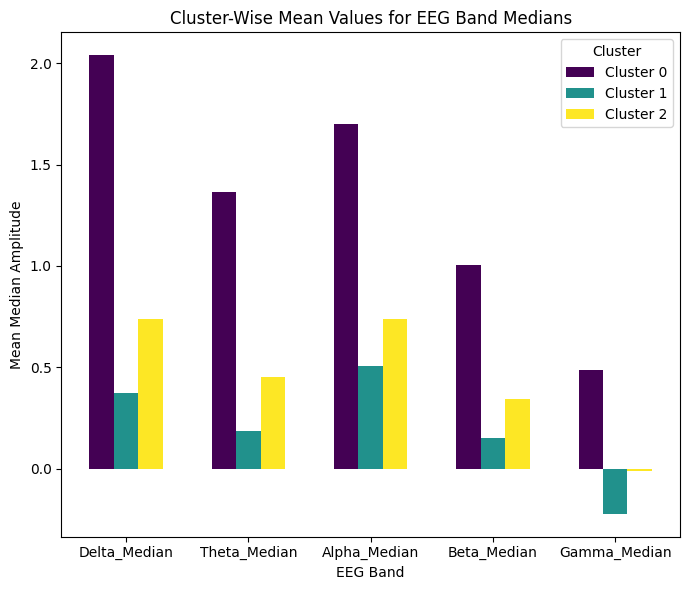

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis

cluster_means_transposed = cluster_means.T

# Set up positions for bars
x = np.arange(len(cluster_means_transposed.index))  # Number of EEG bands
width = 0.2  # Reduce width to make bars closer

# Generate colors from the viridis palette
colors = viridis(np.linspace(0, 1, len(cluster_means_transposed.columns)))

# Plot each cluster as separate bars
fig, ax = plt.subplots(figsize=(7, 6))
for i, cluster in enumerate(cluster_means_transposed.columns):
    ax.bar(
        x + i * width,
        cluster_means_transposed[cluster],
        width,
        label=f'Cluster {cluster}',
        color=colors[i]
    )

# Add labels and title
ax.set_title('Cluster-Wise Mean Values for EEG Band Medians')
ax.set_xlabel('EEG Band')
ax.set_ylabel('Mean Median Amplitude')
ax.set_xticks(x + width * (len(cluster_means_transposed.columns) - 1) / 2)
ax.set_xticklabels(cluster_means_transposed.index)
ax.legend(title='Cluster')

# Optional: Tighten layout
plt.tight_layout()

# Show plot
plt.show()


In [ ]:
# Plot time-series for each cluster
for cluster in neuro_df['Cluster'].unique():
    plt.figure(figsize=(12, 6))
    cluster_data = neuro_df[neuro_df['Cluster'] == cluster]

    for band in ['Delta_Median', 'Theta_Median', 'Alpha_Median', 'Beta_Median', 'Gamma_Median']:
        plt.plot(cluster_data['TimeStamp'], cluster_data[band], label=band, alpha=0.7)

    plt.title(f'Time-Series of EEG Band Medians for Cluster {cluster}')
    plt.xlabel('Time')
    plt.ylabel('Median Amplitude')
    plt.legend()
    plt.grid()
    plt.show()
